## Experimenting with text categorization

### Step 1: Download and review the 20 Newsgroups corpus

In [1]:
# download the 20 newsgroups corpus
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Step 2: choose a subset of the categories that you think will have minimal overlap
    (fill in the blanks)

In [2]:
categories = ['rec.autos', 'misc.forsale','talk.politics.misc', 'talk.politics.guns']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

### Step 3: Build a pipeline with a MultinomialNB classifier

In [3]:
# convert to a numerical vector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

### Step 4: Apply your model to the training data, then predict labels for test data

In [4]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

### Step 5: Visualize the performance using a confusion matrix

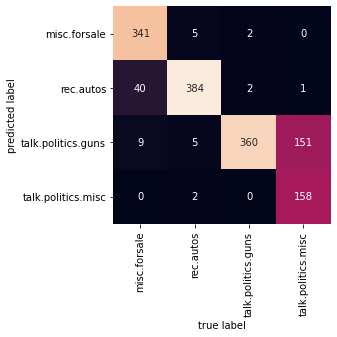

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Step 6: Review the results. Did you manage to find any categories that were predicted with 100% accuracy?
(if not, try different categories)

### Step 7: Choose a subset of the categories that you think will have maximal overlap
    (fill in the blanks)

In [ ]:
categories = [____, ____, ____, ____]
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

### Repeat steps 4-5 using your new categories. Did you manage to find any categories that were consistently misclassified? What does that suggest?

In [6]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [7]:
predict_category('The conservative party voted in favour of Brexit')

'talk.politics.misc'